<a href="https://colab.research.google.com/github/kkkumar2/Shoe_classification/blob/main/shoe_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Imarticus/DL EXAM/Shoe Classification

/content/drive/MyDrive/Imarticus/DL EXAM/Shoe Classification


In [3]:
pwd

'/content/drive/MyDrive/Imarticus/DL EXAM/Shoe Classification'

In [4]:
train_path="/content/drive/MyDrive/Imarticus/DL EXAM/Shoe Classification/train"
val_path="/content/drive/MyDrive/Imarticus/DL EXAM/Shoe Classification/test"
test_path="/content/drive/MyDrive/Imarticus/DL EXAM/Shoe Classification/test1"

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, MaxPool2D 
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint ,EarlyStopping
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [6]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=3, activation="softmax"))

# (4) Compile 
model.compile(loss='CategoricalCrossentropy', optimizer='adam',metrics=['accuracy'])
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [7]:
# Part 2 - Fitting the CNN to the images

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
# Data Augmentation
test_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
# Data Augmentation
valid_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')



valid_set = train_datagen.flow_from_directory(val_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')  

Found 778 images belonging to 3 classes.
Found 74 images belonging to 3 classes.


In [11]:
checkpoint = ModelCheckpoint(filepath='vgg16_scratch.h5', 
                               verbose=1, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)


callbacks = [checkpoint,early_stopping,lr_reducer]

#callbacks = [checkpoint]

start = datetime.now()

model.fit_generator(
  train_set,
  validation_data=valid_set,
  epochs=30,
  steps_per_epoch=5,
  validation_steps=valid_set.n //valid_set.batch_size,
    callbacks=callbacks)


duration = datetime.now() - start
print("Training completed in time: ", duration)     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
5/5 [==============================] - ETA: 0s - loss: 1.1017 - accuracy: 0.3623
Epoch 1: val_loss improved from inf to 1.12483, saving model to vgg16_scratch.h5
5/5 [==============================] - 11s 3s/step - loss: 1.1017 - accuracy: 0.3623 - val_loss: 1.1248 - val_accuracy: 0.3438 - lr: 0.0010
Epoch 2/30
5/5 [==============================] - ETA: 0s - loss: 1.0759 - accuracy: 0.4058
Epoch 2: val_loss improved from 1.12483 to 1.09956, saving model to vgg16_scratch.h5
5/5 [==============================] - 9s 2s/step - loss: 1.0759 - accuracy: 0.4058 - val_loss: 1.0996 - val_accuracy: 0.3906 - lr: 0.0010
Epoch 3/30
5/5 [==============================] - ETA: 0s - loss: 1.0725 - accuracy: 0.3812
Epoch 3: val_loss did not improve from 1.09956
5/5 [==============================] - 8s 1s/step - loss: 1.0725 - accuracy: 0.3812 - val_loss: 1.1139 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 4/30
5/5 [==============================] - ETA: 0s - loss: 1.0651 - accuracy: 0.4125
E

In [13]:
#importing all depandancies 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten ,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [24]:
IMAGE_SIZE = [224, 224]
#Defining and downloading VGG 16 model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [25]:
#Frzeeing existing weights
for layer in vgg.layers:
  layer.trainable = False
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7ff539889b50> False
<keras.layers.convolutional.Conv2D object at 0x7ff53a234c50> False
<keras.layers.convolutional.Conv2D object at 0x7ff53a126490> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff539893e90> False
<keras.layers.convolutional.Conv2D object at 0x7ff53989c950> False
<keras.layers.convolutional.Conv2D object at 0x7ff5398a0e10> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff539893710> False
<keras.layers.convolutional.Conv2D object at 0x7ff539828210> False
<keras.layers.convolutional.Conv2D object at 0x7ff53982da90> False
<keras.layers.convolutional.Conv2D object at 0x7ff539828c10> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff53983a710> False
<keras.layers.convolutional.Conv2D object at 0x7ff53983ad90> False
<keras.layers.convolutional.Conv2D object at 0x7ff53988edd0> False
<keras.layers.convolutional.Conv2D object at 0x7ff539836d10> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff53984e310>

In [26]:
# useful for getting number of classes
folders = glob("/content/drive/MyDrive/Imarticus/DL EXAM/Shoe Classification/train/*")
print(len(folders))

3


In [27]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [28]:
model.compile(loss='CategoricalCrossentropy', optimizer='adam',metrics=['accuracy'])

In [30]:
checkpoint = ModelCheckpoint(filepath='vgg16_pretrained.h5', 
                               verbose=1, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)


callbacks = [checkpoint,early_stopping,lr_reducer]

#callbacks = [checkpoint]

start = datetime.now()

history = model.fit_generator(
  train_set,
  validation_data=valid_set,
  epochs=30,
  steps_per_epoch=5,
  validation_steps=valid_set.n //valid_set.batch_size,
    callbacks=callbacks)


duration = datetime.now() - start
print("Training completed in time: ", duration)     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
5/5 [==============================] - ETA: 0s - loss: 1.8877 - accuracy: 0.8813
Epoch 1: val_loss improved from inf to 1.20793, saving model to vgg16_pretrained.h5
5/5 [==============================] - 6s 1s/step - loss: 1.8877 - accuracy: 0.8813 - val_loss: 1.2079 - val_accuracy: 0.8906 - lr: 3.1623e-04
Epoch 2/30
5/5 [==============================] - ETA: 0s - loss: 1.6221 - accuracy: 0.8938
Epoch 2: val_loss did not improve from 1.20793
5/5 [==============================] - 4s 896ms/step - loss: 1.6221 - accuracy: 0.8938 - val_loss: 2.8291 - val_accuracy: 0.8594 - lr: 3.1623e-04
Epoch 3/30
5/5 [==============================] - ETA: 0s - loss: 1.3051 - accuracy: 0.9125
Epoch 3: val_loss did not improve from 1.20793
5/5 [==============================] - 4s 939ms/step - loss: 1.3051 - accuracy: 0.9125 - val_loss: 1.5066 - val_accuracy: 0.9062 - lr: 3.1623e-04
Epoch 4/30
5/5 [==============================] - ETA: 0s - loss: 1.4182 - accuracy: 0.9187
Epoch 4: val_loss d

In [33]:
import pandas as pd
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy,lr
0,1.887682,0.881250,1.207930,0.890625,0.000316
1,1.622127,0.893750,2.829067,0.859375,0.000316
2,1.305106,0.912500,1.506570,0.906250,0.000316
3,1.418210,0.918750,1.622327,0.875000,0.000316
4,1.348018,0.905797,1.318842,0.937500,0.000316
5,1.091061,0.937500,2.619386,0.875000,0.000316


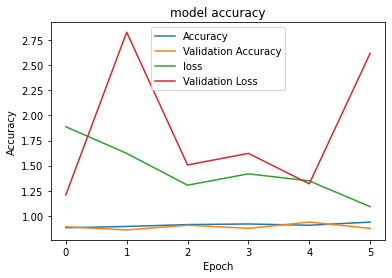

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

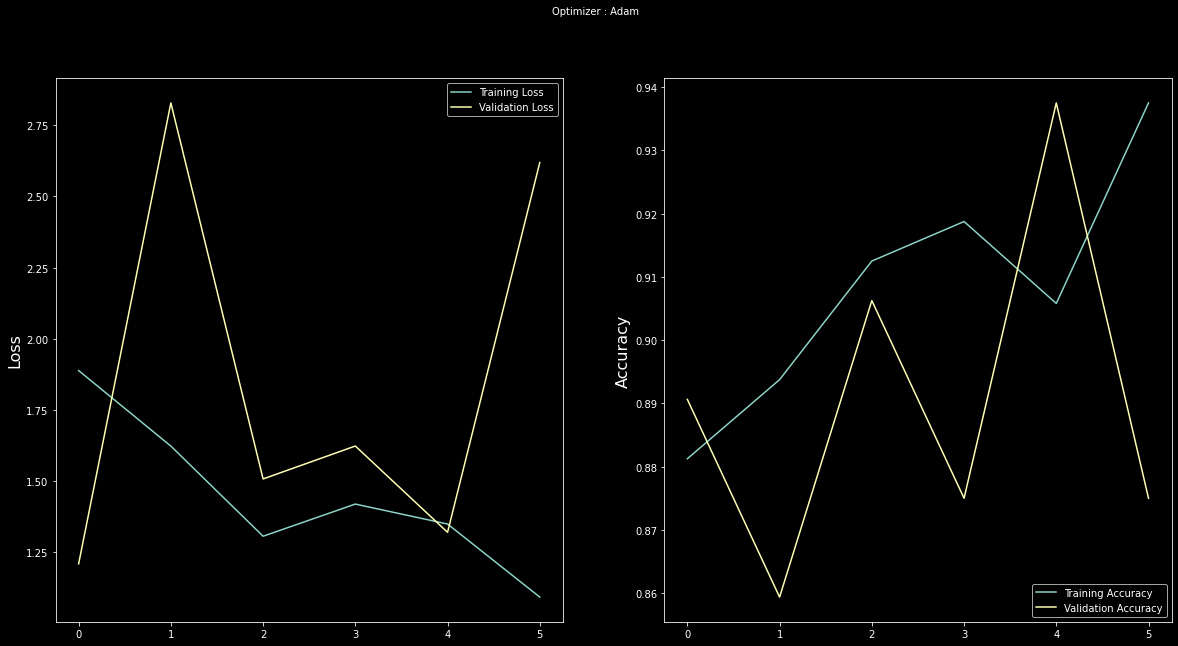

In [38]:
plt.style.use('dark_background')
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [39]:
IMAGE_SIZE = [224, 224]
#Defining and downloading VGG 16 model
vgg2 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [40]:
#Frzeeing existing weights
for layer in vgg2.layers[:-2]:
  layer.trainable = False

In [41]:
#Frzeeing existing weights
for layer in vgg2.layers:
  print(layer,layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x7ff4c5382350> False
<keras.layers.convolutional.Conv2D object at 0x7ff4c5382d10> False
<keras.layers.convolutional.Conv2D object at 0x7ff4c5297cd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff4c5128f10> False
<keras.layers.convolutional.Conv2D object at 0x7ff4c521dad0> False
<keras.layers.convolutional.Conv2D object at 0x7ff4c52870d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff4c5139410> False
<keras.layers.convolutional.Conv2D object at 0x7ff4c5140290> False
<keras.layers.convolutional.Conv2D object at 0x7ff4c513b410> False
<keras.layers.convolutional.Conv2D object at 0x7ff4c5141890> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff4c514ab10> False
<keras.layers.convolutional.Conv2D object at 0x7ff4c5141390> False
<keras.layers.convolutional.Conv2D object at 0x7ff4c514e5d0> False
<keras.layers.convolutional.Conv2D object at 0x7ff4c51580d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff4c5156710>

In [42]:
# useful for getting number of classes
folders = glob("/content/drive/MyDrive/Imarticus/DL EXAM/Shoe Classification/train/*")
print(len(folders))

3


In [44]:
l1=Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(vgg2.output)
l2=MaxPool2D(pool_size=(2,2),strides=(2,2))(l1)
l3=Conv2D(filters=512, kernel_size=(3,3),activation="relu")(l2)
x = Flatten()(l3)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg2.input, outputs=prediction)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [45]:
model.compile(loss='CategoricalCrossentropy', optimizer='adam',metrics=['accuracy'])

In [46]:
checkpoint = ModelCheckpoint(filepath='vgg16_convadd_pretrained.h5', 
                               verbose=1, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)


callbacks = [checkpoint,early_stopping,lr_reducer]

#callbacks = [checkpoint]

start = datetime.now()

history = model.fit_generator(
  train_set,
  validation_data=valid_set,
  epochs=30,
  steps_per_epoch=5,
  validation_steps=valid_set.n //valid_set.batch_size,
    callbacks=callbacks)


duration = datetime.now() - start
print("Training completed in time: ", duration)     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
5/5 [==============================] - ETA: 0s - loss: 109.9327 - accuracy: 0.3313
Epoch 1: val_loss improved from inf to 3.04758, saving model to vgg16_convadd_pretrained.h5
5/5 [==============================] - 7s 1s/step - loss: 109.9327 - accuracy: 0.3313 - val_loss: 3.0476 - val_accuracy: 0.3438 - lr: 0.0010
Epoch 2/30
5/5 [==============================] - ETA: 0s - loss: 1.4320 - accuracy: 0.5125
Epoch 2: val_loss improved from 3.04758 to 0.97706, saving model to vgg16_convadd_pretrained.h5
5/5 [==============================] - 5s 1s/step - loss: 1.4320 - accuracy: 0.5125 - val_loss: 0.9771 - val_accuracy: 0.4844 - lr: 0.0010
Epoch 3/30
5/5 [==============================] - ETA: 0s - loss: 0.8292 - accuracy: 0.5797
Epoch 3: val_loss improved from 0.97706 to 0.84255, saving model to vgg16_convadd_pretrained.h5
5/5 [==============================] - 5s 987ms/step - loss: 0.8292 - accuracy: 0.5797 - val_loss: 0.8426 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 4/30
5/5 [

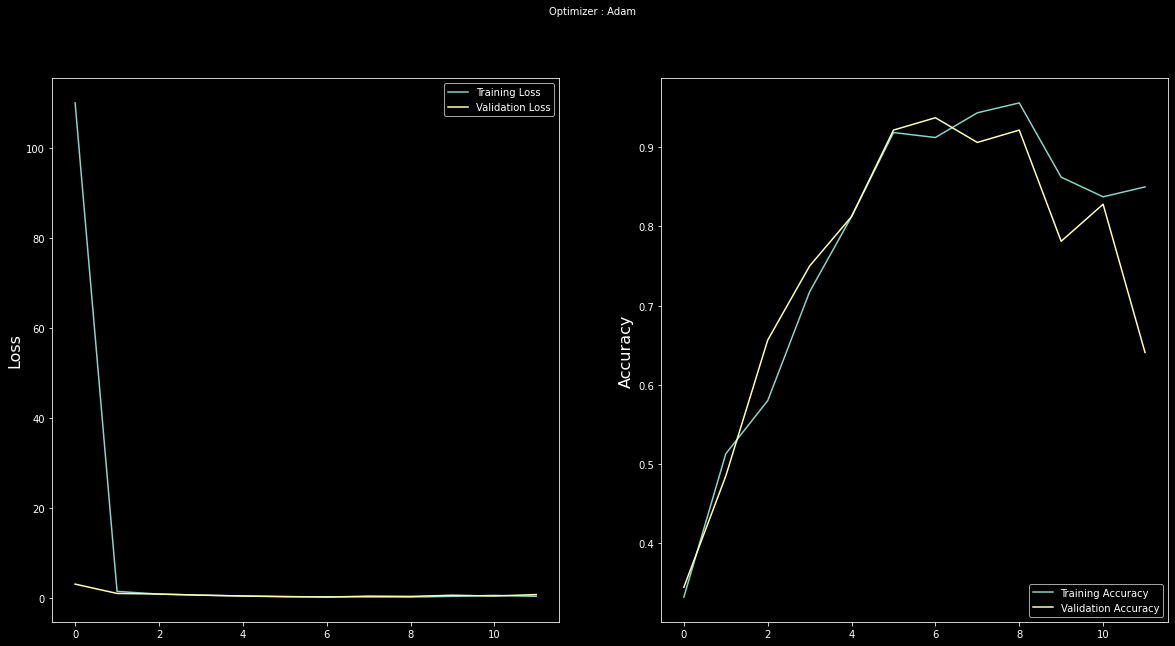

In [47]:
plt.style.use('dark_background')
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [48]:
import pandas as pd
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy,lr
0,109.932693,0.331250,3.047579,0.343750,0.001
1,1.432037,0.512500,0.977056,0.484375,0.001
2,0.829237,0.579710,0.842554,0.656250,0.001
3,0.601450,0.717391,0.591926,0.750000,0.001
4,0.408469,0.812500,0.407534,0.812500,0.001
5,0.229448,0.918750,0.298501,0.921875,0.001
6,0.250806,0.912500,0.165878,0.937500,0.001
7,0.193770,0.943750,0.378774,0.906250,0.001
8,0.182323,0.956250,0.315859,0.921875,0.001
9,0.330923,0.862319,0.576891,0.781250,0.001


In [49]:
print(max(df.val_accuracy))

0.9375


This looks like the best model for this dataset is VGG16 pretrained model with last two layers trained again and one convolution layer added extra to reduce the image size to 1*1 (an ideal final feature shape) 

The Validation loss is decreasing exponentially and being constant near training loss making the model best and validation accuracy is better since the dataset is very small 